In [1]:
!pip install matplotlib
!pip install pydicom


In [2]:
import matplotlib.pyplot as plt
from pydicom.data import get_testdata_files
from pydicom.filereader import dcmread

In [3]:
import pydicom
import os

pasta_raiz = '/A/motomed/radiomics/data/download/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-NA-NA-35511/'

nome_do_arquivo = '1-1.dcm'

def encontrar_arquivo_dicom(pasta):
    for pasta_atual, subpastas, arquivos in os.walk(pasta):
        for arquivo in arquivos:
            if arquivo == nome_do_arquivo:
                caminho_completo = os.path.join(pasta_atual, arquivo)
                ds = pydicom.dcmread(caminho_completo)
                return ds
    return None

imagem_dicom = encontrar_arquivo_dicom(pasta_raiz)
if imagem_dicom:
    print("Arquivo DICOM encontrado e carregado.")
else:
    print("Arquivo DICOM não encontrado.")
    
imagem_dicom

Arquivo DICOM encontrado e carregado.


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.307896144859643716158189196068
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', '']
(0008, 0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Presentation
(0008, 0018) SOP Instance UID        

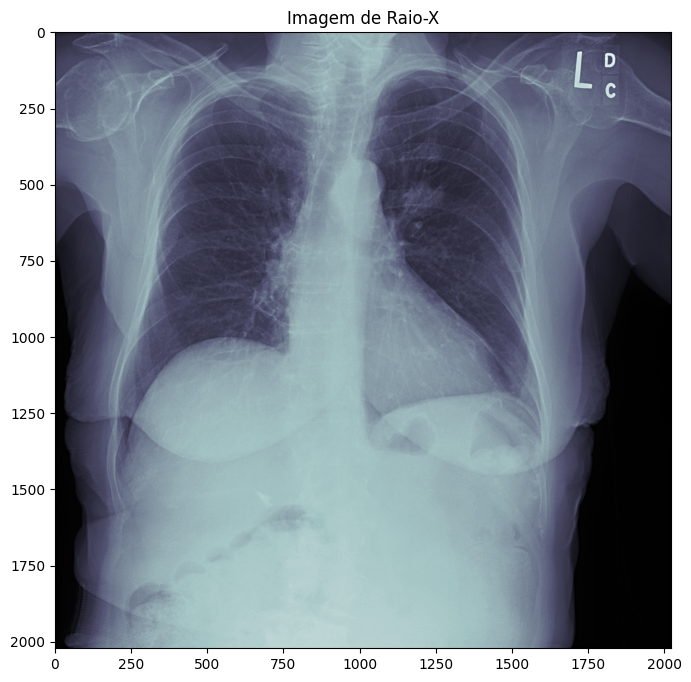

In [4]:

pixel_array = imagem_dicom.pixel_array

plt.figure(figsize=(8, 8))
plt.imshow(pixel_array, cmap=plt.cm.bone)
plt.title("Imagem de Raio-X")
plt.show()

In [5]:
patient_name = imagem_dicom.PatientName
print("Patient's Name:", patient_name)

pixel_array = imagem_dicom.pixel_array
print("Pixel array", pixel_array)

Patient's Name: 
Pixel array [[2203 2199 2263 ... 1446 1436 1404]
 [2300 2300 2367 ... 1597 1542 1477]
 [2322 2410 2383 ... 1641 1608 1537]
 ...
 [ 414  434  457 ...  313  322  301]
 [ 430  429  449 ...  306  322  298]
 [ 472  449  427 ...  327  311  307]]


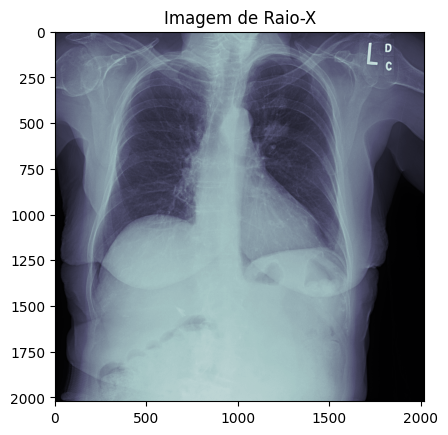

In [6]:
#Sintaxe da documentacao 

plt.imshow(imagem_dicom.pixel_array, cmap=plt.cm.bone)
plt.title("Imagem de Raio-X")
plt.show()

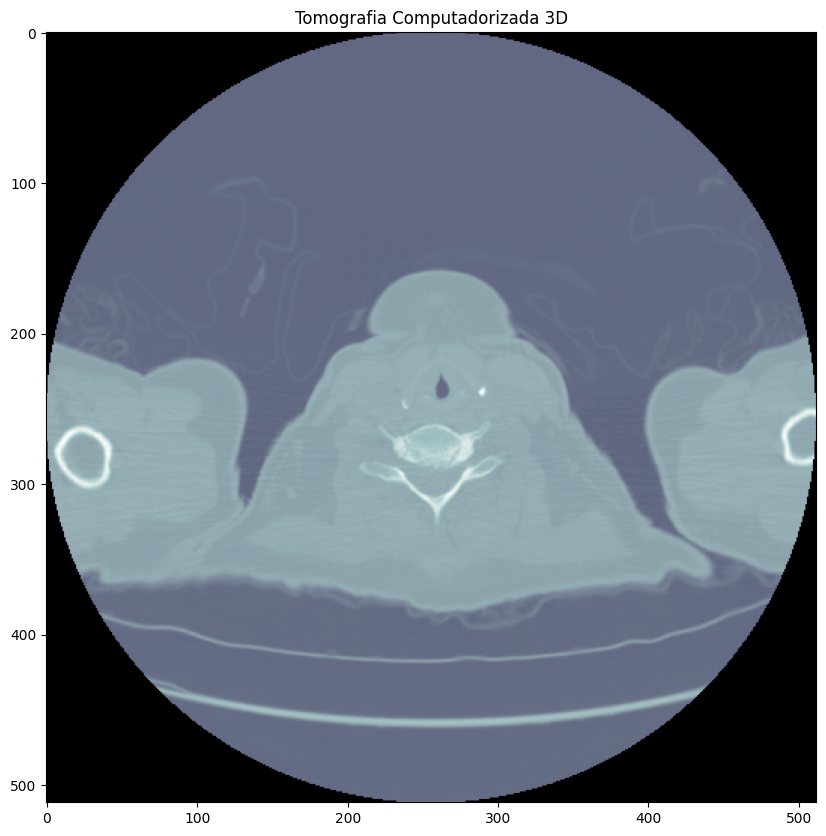

In [7]:
import numpy as np

pasta_tomografia = '/A/motomed/radiomics/data/download/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0002/01-01-2000-NA-NA-98329/3000522.000000-NA-04919/'

arquivos_dicom = [os.path.join(pasta_tomografia, arquivo) for arquivo in os.listdir(pasta_tomografia) if arquivo.endswith('.dcm')]

arquivos_dicom.sort()

volume_3d = np.stack([pydicom.dcmread(arquivo).pixel_array for arquivo in arquivos_dicom])

plt.figure(figsize=(10, 10))
plt.imshow(volume_3d[0, :, :], cmap=plt.cm.bone)
plt.title("Tomografia Computadorizada 3D")
plt.show()

In [8]:
from ipywidgets import interact

def visualizar_tomografia(corte):
    ds = pydicom.dcmread(arquivos_dicom[corte])
    pixel_array = ds.pixel_array

    plt.figure(figsize=(8, 8))
    plt.imshow(pixel_array, cmap=plt.cm.bone)
    plt.title(f"Tomografia - Corte {corte}")
    plt.show()

interact(visualizar_tomografia, corte=(0, len(arquivos_dicom)-1))

interactive(children=(IntSlider(value=130, description='corte', max=260), Output()), _dom_classes=('widget-int…

<function __main__.visualizar_tomografia(corte)>

In [19]:
pasta_teste = '/A/motomed/radiomics/data/download/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0002/teste'
arquivos_teste = [os.path.join(pasta_teste, arquivo) for arquivo in os.listdir(pasta_teste) if arquivo.endswith('.dcm')]

interact(visualizar_tomografia, corte=(0, len(arquivos_teste)-1))

interactive(children=(IntSlider(value=130, description='corte', max=260), Output()), _dom_classes=('widget-int…

<function __main__.visualizar_tomografia(corte)>

In [10]:
instance_number = imagem_dicom.InstanceNumber
print(instance_number)

1


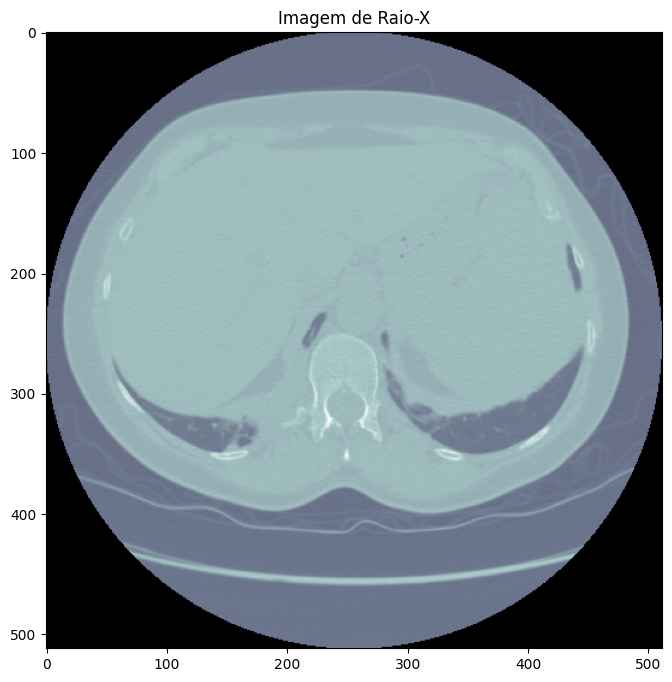

227


In [31]:
image=pydicom.dcmread('/A/motomed/radiomics/data/download/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0002/teste/OueYlmML.dcm')
pixel_array=image.pixel_array
plt.figure(figsize=(8, 8))
plt.imshow(pixel_array, cmap=plt.cm.bone)
plt.title("Imagem de Raio-X")
plt.show()

print(image.InstanceNumber)

Função para renomear cortes de tomografia com nome saleatórios,
assim, podemos aprender a ordena-los através do instance number

In [11]:
import shutil
import random

def copy_files_randomly(source_folder, destination_folder):
    files = os.listdir(source_folder)

    random.shuffle(files)

    for filename in files:
        source_file = os.path.join(source_folder, filename)
        destination_file = os.path.join(destination_folder, filename)
        shutil.copy(source_file, destination_file)
        print(f"Arquivo copiado: {filename}")

if __name__ == "__main__":
    source_folder = '/A/motomed/radiomics/data/download/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0002/01-01-2000-NA-NA-98329/3000522.000000-NA-04919/'
    destination_folder = '/A/motomed/radiomics/data/download/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0002/teste/'

    copy_files_randomly(source_folder, destination_folder)


In [17]:
import shutil
import random
import string

destination_folder = '/A/motomed/radiomics/data/download/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0002/teste/'
folder_path = [os.path.join(pasta_teste, arquivo) for arquivo in os.listdir(pasta_teste) if arquivo.endswith('.dcm')]


def rename_dicom_files_with_random_names(folder_path):

    files = os.listdir(folder_path)

    random.shuffle(files)

    for old_filename in files: #lista com nomes antigos dos arquivos
        
        old_filepath = os.path.join(folder_path, old_filename)

        if old_filename.lower().endswith('.dcm'):
 
            #renomeia aleatoriamente
            new_filename = ''.join(random.choice(string.ascii_letters + string.digits) for _ in range(8)) + '.dcm'

            new_filepath = os.path.join(folder_path, new_filename)
            shutil.move(old_filepath, new_filepath)
            
        else:
            print(f"Arquivo não DICOM: {old_filename}")

if __name__ == "__main__":
    rename_dicom_files_with_random_names(destination_folder)


Arquivo não DICOM: 071.xml


In [18]:
def print_instance_numbers(folder_path):
    
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        if filename.lower().endswith('.dcm'):
            arquivo = pydicom.dcmread(file_path)
            instance_number = arquivo.InstanceNumber
            print(f"Nome do arquivo: {filename}, InstanceNumber: {instance_number}")

print_instance_numbers(destination_folder)

Nome do arquivo: alCiDta8.dcm, InstanceNumber: 183
Nome do arquivo: vdH5EuR0.dcm, InstanceNumber: 107
Nome do arquivo: 2OOF4SlO.dcm, InstanceNumber: 100
Nome do arquivo: wwpFp2kz.dcm, InstanceNumber: 119
Nome do arquivo: Bt3JRJgu.dcm, InstanceNumber: 121
Nome do arquivo: aXqsnWoy.dcm, InstanceNumber: 182
Nome do arquivo: bJs3aHLs.dcm, InstanceNumber: 216
Nome do arquivo: 2LwvNTjl.dcm, InstanceNumber: 101
Nome do arquivo: uAXCNpU6.dcm, InstanceNumber: 145
Nome do arquivo: vvSkQX5m.dcm, InstanceNumber: 26
Nome do arquivo: 2Rukw7Yl.dcm, InstanceNumber: 120
Nome do arquivo: u5EEhMy7.dcm, InstanceNumber: 146
Nome do arquivo: KCGlURAL.dcm, InstanceNumber: 236
Nome do arquivo: czdTDloh.dcm, InstanceNumber: 32
Nome do arquivo: Q37aEtrm.dcm, InstanceNumber: 174
Nome do arquivo: JeNxEjaa.dcm, InstanceNumber: 11
Nome do arquivo: sWrzIxff.dcm, InstanceNumber: 243
Nome do arquivo: LbHXw9NR.dcm, InstanceNumber: 211
Nome do arquivo: 1BDYlmFh.dcm, InstanceNumber: 39
Nome do arquivo: kAQP4jQT.dcm, Inst

Como podemos visualizar, eles foram armazenados fora de ordem, e isso faz com que a visualização final esteja incorreta, mostrando cortes desordenados.
Ordenando...

In [ ]:
'''def sort_dicom_files_by_instance_number(folder_path):
    dicom_files = [os.path.join(folder_path, arquivo) for arquivo in os.listdir(folder_path) if arquivo.endswith('.dcm')]
    
    def get_instance_number(file_path):
        dicom_data = pydicom.dcmread(file_path)
        return dicom_data.InstanceNumber

    dicom_files = sorted(dicom_files, key=get_instance_number)
    
    return dicom_files

if __name__ == "__main__":
    dicom_files = sort_dicom_files_by_instance_number(destination_folder)

    for arquivo in dicom_files:
        dicom_data = pydicom.dcmread(arquivo)
        instance_number = dicom_data.InstanceNumber
        print(f"Nome do arquivo: {os.path.basename(arquivo)}, InstanceNumber = {instance_number}")'''


TypeError: listdir: path should be string, bytes, os.PathLike, integer or None, not list

In [ ]:
'''interact(visualizar_tomografia, corte=(0, len(destination_folder)-1))'''

interactive(children=(IntSlider(value=44, description='corte', max=88), Output()), _dom_classes=('widget-inter…

<function __main__.visualizar_tomografia(corte)>